# Voltage Levels

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

#https://matplotlib.org/stable/gallery/lines_bars_and_markers/hat_graph.html#sphx-glr-gallery-lines-bars-and-markers-hat-graph-py
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate

def voltageDictfromFile(vFile='/home/oem/datosFits/MicrochipTest_Marzo/datos/05MAY23/vFiles/voltage_skp_lta_v6_microchip.sh'):
    File=vFile.split('/')[-1]
    voltageDict={}
    swingDict={}
    with open(vFile, 'r') as VoltageFile:
        varlist=[]
        for line in VoltageFile:
            #print(line, end='\r')
            if '='in line:
                varlist.append(float(line.split('=')[1]))
            if len(varlist)==2:
                voltageDict[line.split('=')[0][0]]=varlist
                varlist=[]
    vr=-7
    voltageDict['r']=[vr,vr-0.1] #voltaje del nodo de lectura, esta en la seccion del Bias como vr (aumento .01 solo para el plot)
    print(str(voltageDict))

    cell_text = []
    return voltageDict, File

def voltageDictfromFitsFile(fitsImage=None):
    vr=-7
    voltageDict={}
    #{'v': [2.5, 0.0], 't': [2.0, -0.5], 'h': [1.5, -1.0], 's': [1.0, -10.0], 'o': [-2.0, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}

    with fits.open(fitsImage) as header:
        header=header[0].header
        voltageDict[header._cards[29].rawkeyword]=[float(header._cards[29].rawvalue),float(header._cards[30].rawvalue)] #Vl value #Vh value
        voltageDict[header._cards[65].rawkeyword]=[float(header._cards[65].rawvalue),float(header._cards[66].rawvalue)]#Th value
        voltageDict[header._cards[39].rawkeyword]=[float(header._cards[39].rawvalue),float(header._cards[40].rawvalue)]#Tl value
        voltageDict[header._cards[49].rawkeyword]=[float(header._cards[49].rawvalue),float(header._cards[50].rawvalue)]
        voltageDict[header._cards[57].rawkeyword]=[float(header._cards[57].rawvalue),float(header._cards[58].rawvalue)]
        voltageDict[header._cards[53].rawkeyword]=[float(header._cards[53].rawvalue),float(header._cards[54].rawvalue)]
        voltageDict['r']=[vr,vr-0.1] #voltaje del nodo de lectura, esta en la seccion del Bias como vr (aumento .01 solo para el plot)
        voltageDict[header._cards[61].rawkeyword]=[float(header._cards[61].rawvalue),float(header._cards[62].rawvalue)]
        


    
    #voltageDict['r']=[vr,vr-0.1] #voltaje del nodo de lectura, esta en la seccion del Bias como vr (aumento .01 solo para el plot)
    print(str(voltageDict))
    return voltageDict, fitsImage.split('/')[-1]

def outputStageTiming(voltageDict, fileName):
    
    fig, ax = plt.subplots()

    for key in voltageDict:
        x=0
        if key.startswith('v') or key.startswith('t') or key.startswith('h') or key.startswith('s') or key.startswith('o') or key.startswith('d') or key.startswith('V') or key.startswith('T') or key.startswith('H') or key.startswith('S') or key.startswith('O') or key.startswith('r') or key.startswith('D'):
            
            #   'key' : [high=0, low=1]
            #high states
            x+=1
            if voltageDict[key][0]>0:   
                ax.annotate(voltageDict[key][0],(key, float(voltageDict[key][0]+0.05)))
                ax.bar(key,voltageDict[key][0],color='black',label=key)
                if voltageDict[key][1]>0:
                    ax.bar(key,voltageDict[key][1], color='white',label=key)
                else:
                    ax.bar(key,voltageDict[key][1], color='black',label=key)          
            elif voltageDict[key][1]<0:
                ax.annotate(voltageDict[key][0],(key, float(voltageDict[key][0]+0.05)))
                ax.bar(key,voltageDict[key][1],color='black',label=key)
                if voltageDict[key][0]<0:
                    ax.bar(key,voltageDict[key][0], color='white',label=key)
                else:
                    ax.bar(key,voltageDict[key][1], color='black',label=key)
           
            if key != 'r':
                ax.annotate(voltageDict[key][1],(key, float(voltageDict[key][1]-.5))) 
            
    plt.title(fileName)

In [2]:
#voltageDictfromFitsFile('/home/oem/datosFits/MicrochipTest_Marzo/datos/12MAY23/proc_skp_m-009_microchip_T_170__Vv62_NSAMP_324_NROW_100_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_6.fits')

{'v': [-3.0, -5.5], 't': [-3.5, -6.0], 'h': [-4.0, -7.5], 's': [-4.5, -10.0], 'o': [-5.0, -8.0], 'r': [-7, -7.1], 'd': [-1.0, -10.0]}


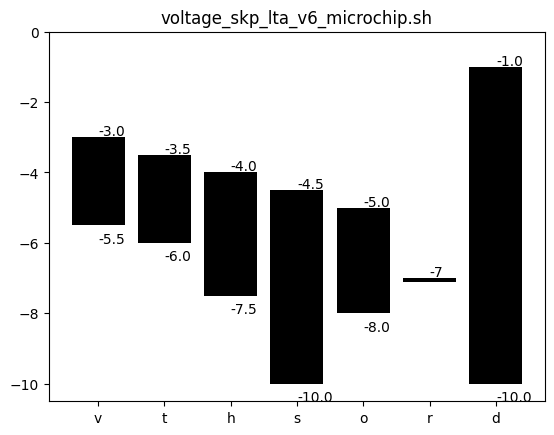

In [17]:
voltageDict,file=voltageDictfromFile('/home/oem/datosFits/MicrochipTest_Marzo/datos/05MAY23/vFiles/voltage_skp_lta_v6_microchip.sh')
#voltageDict,file=voltageDictfromFitsFile('/home/oem/datosFits/MicrochipTest_Marzo/datos/12MAY23/proc_skp_m-009_microchip_T_170__Vv71_NSAMP_324_NROW_100_NCOL_700_EXPOSURE_0_NBINROW_1_NBINCOL_1_img_16.fits')
outputStageTiming(voltageDict,file)

# plot data
busqueda de electronePeaks

FileNotFoundError: [Errno 2] No such file or directory: '--ip=127.0.0.1'

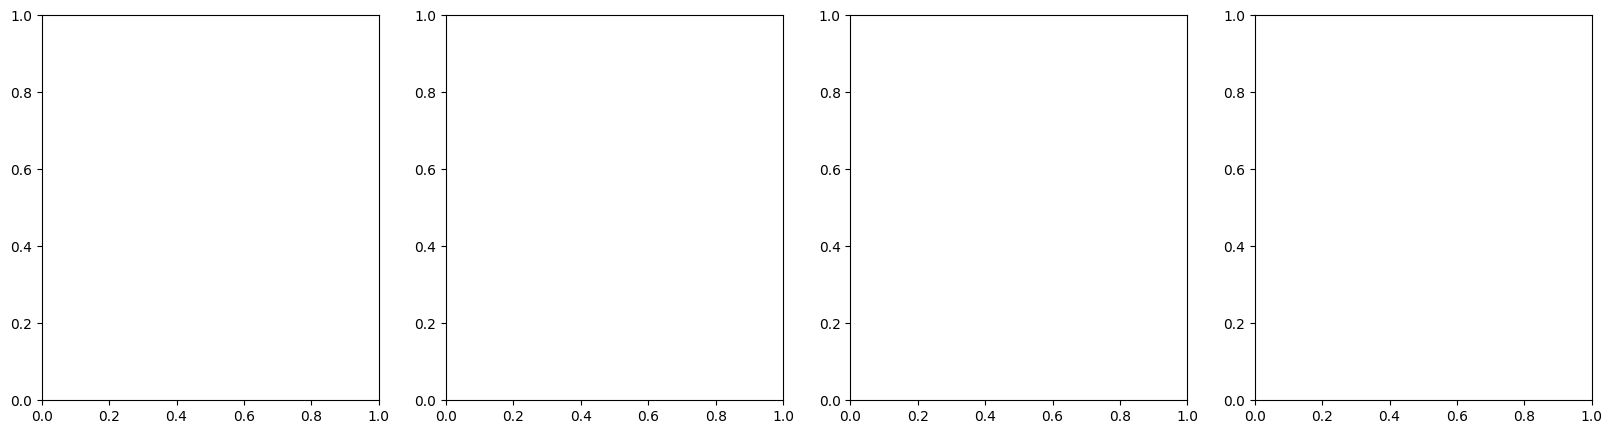

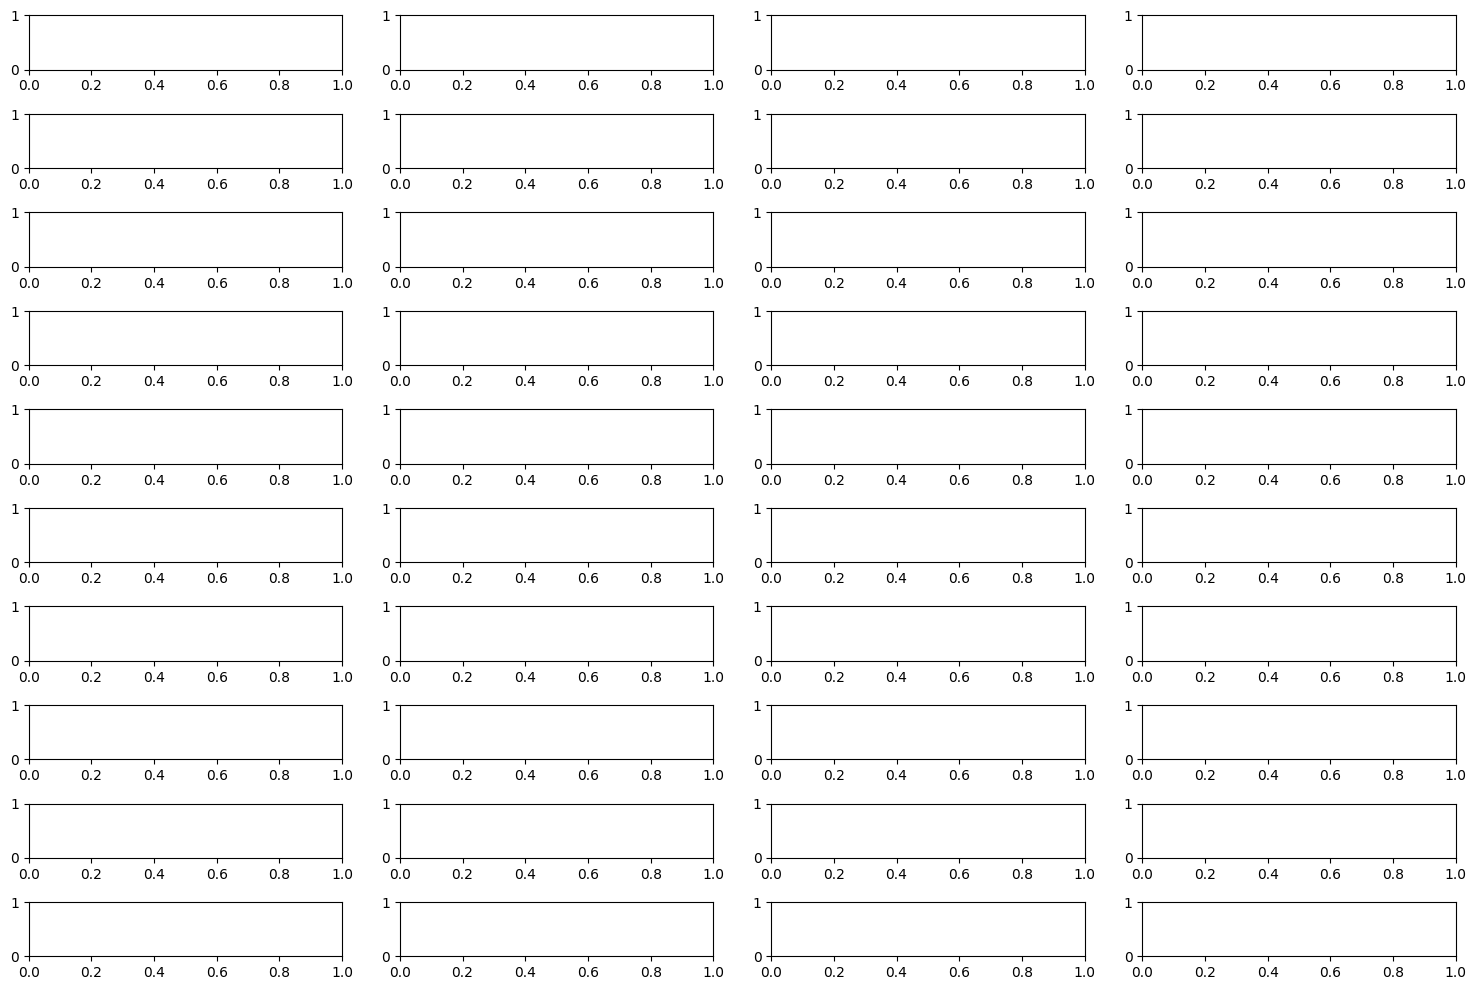

In [3]:
from plotdata_sub_electronPeak import plotData as pt
file='/home/maumtz/datosFits/testMITLL/14NOV22/proc_skp_module26_MITLL01_externalVr_Vtest_T170_testLeakage__NSAMP324_NROW50_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img13.fits'
pt(file)

# Propuesta
#### -leer el header del archivo fits y extraer directamente de la imagen los parametros de los relojes.
#### -iterar sobre una lista de arhivos y generar la imagen correspondiente a cada uno de ellos
#### -Salvar cada imagen con el nombre correspondiente a la imagen que esta analizando